In [ ]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
dataset= pd.read_csv('MouseTrain.csv')  # dataset importing
#features and labels   # for binary classification (genotype label)
x= dataset.iloc[:,:-2].values # getting features
y=dataset.iloc[:,-2].values  #label for model1

y2=dataset.iloc[:,-1].values # label for model2


In [ ]:
dataset.info()     # to get all the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            225 non-null    float64
 1   ITSN1_N             225 non-null    float64
 2   BDNF_N              225 non-null    float64
 3   NR1_N               225 non-null    float64
 4   NR2A_N              225 non-null    float64
 5   pAKT_N              225 non-null    float64
 6   pBRAF_N             225 non-null    float64
 7   pCAMKII_N           225 non-null    float64
 8   pCREB_N             225 non-null    float64
 9   pELK_N              225 non-null    float64
 10  pERK_N              225 non-null    float64
 11  pJNK_N              225 non-null    float64
 12  PKCA_N              225 non-null    float64
 13  pMEK_N              225 non-null    float64
 14  pNR1_N              225 non-null    float64
 15  pNR2A_N             225 non-null    float64
 16  pNR2B_N 

#observations

As we can see from the info of the dataset
the feature H3MeK4_N(75) has almost half of the values are nan so we can neglect this features because of too many unknown values
and for the column no (74,73,69,68) we can fill the nan values by using SimpleImputer class from sklearn

In [ ]:
print(np.shape(x))
print(np.shape(y))

(225, 77)
(225,)


#checking the spread of each feature using histogram

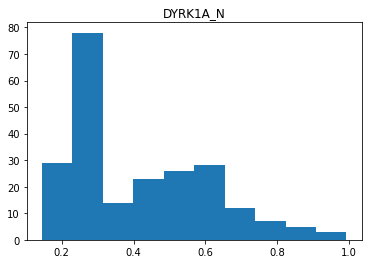

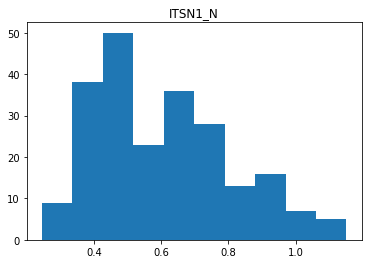

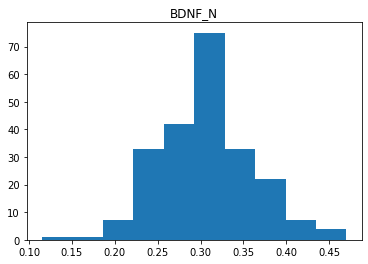

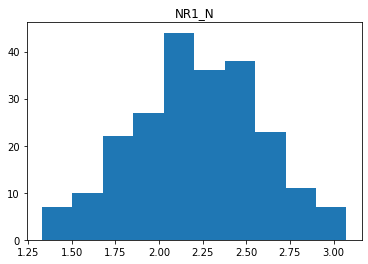

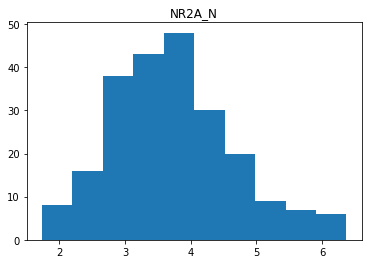

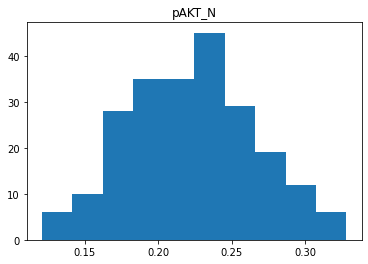

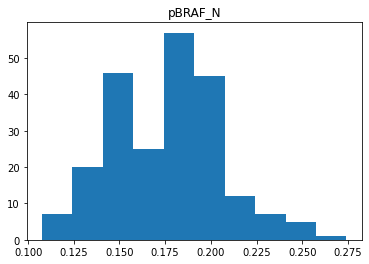

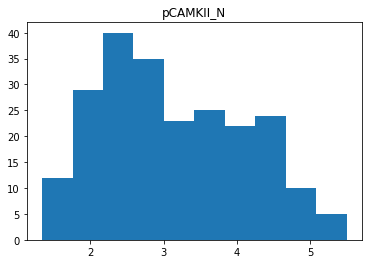

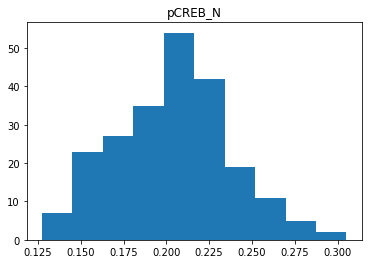

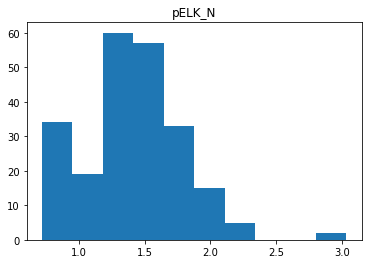

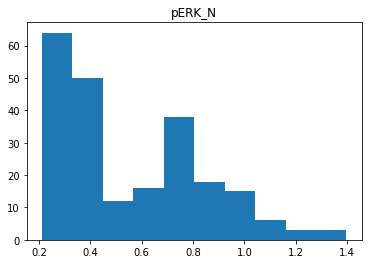

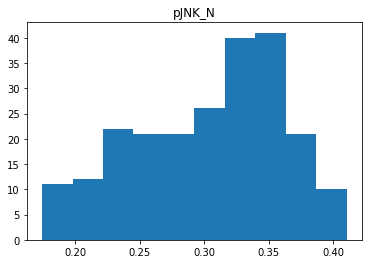

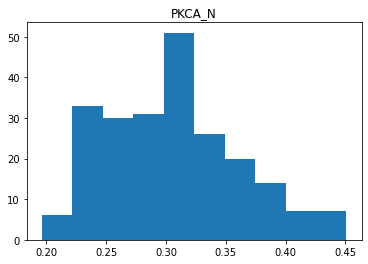

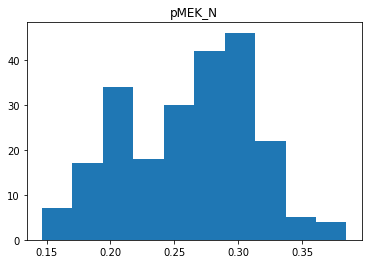

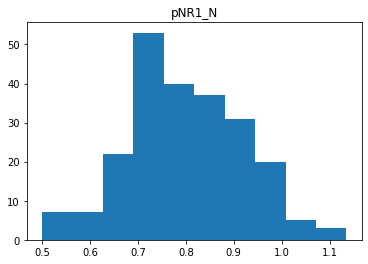

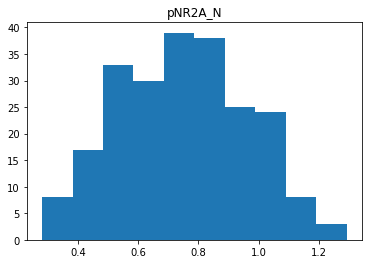

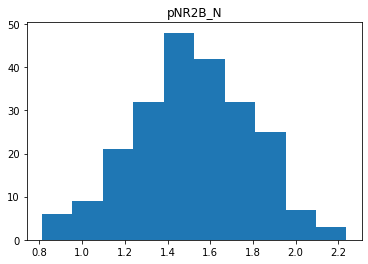

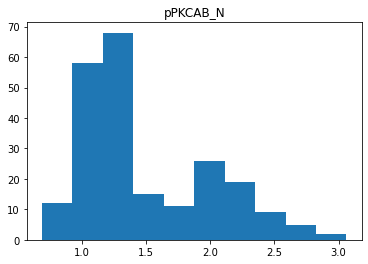

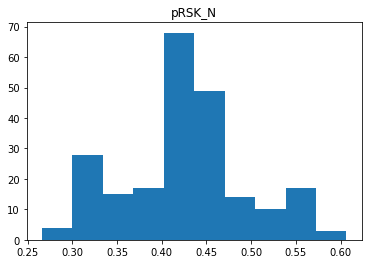

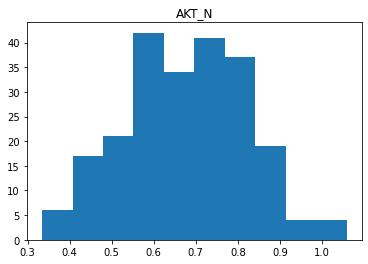

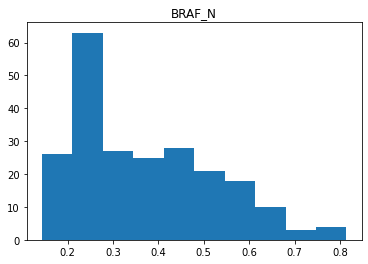

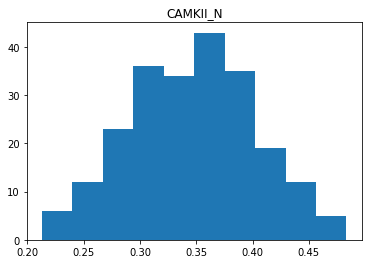

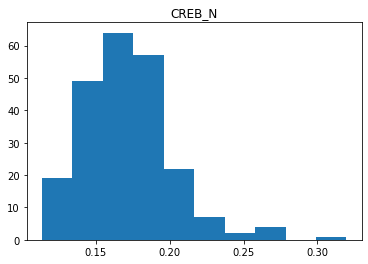

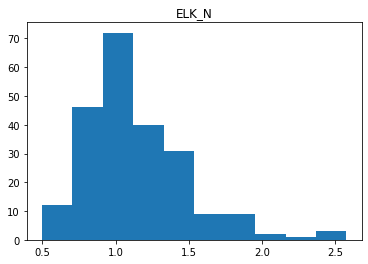

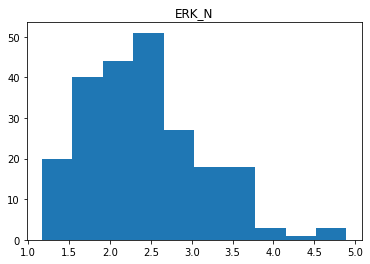

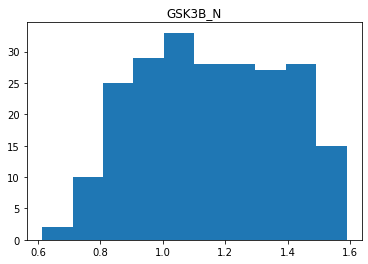

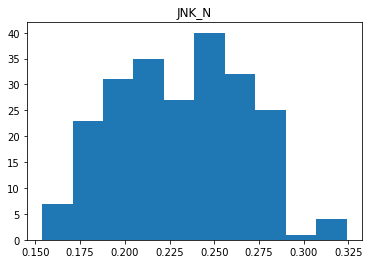

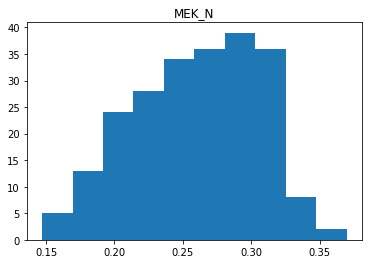

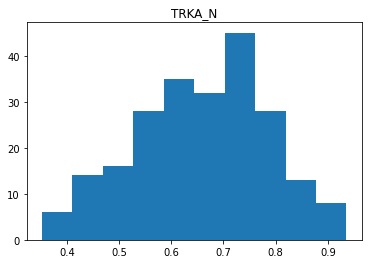

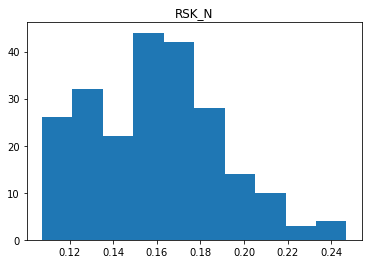

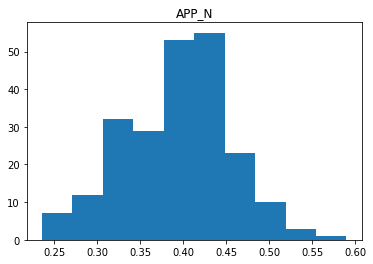

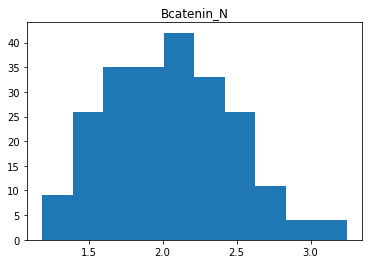

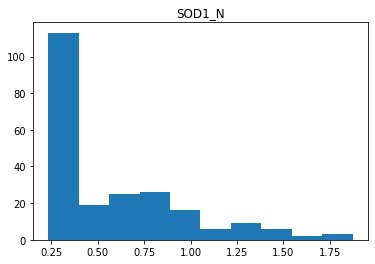

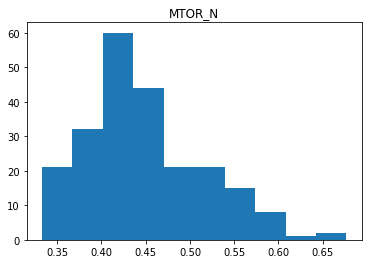

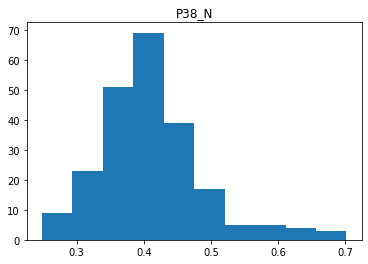

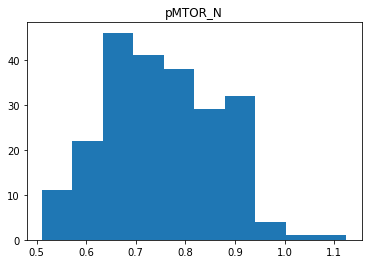

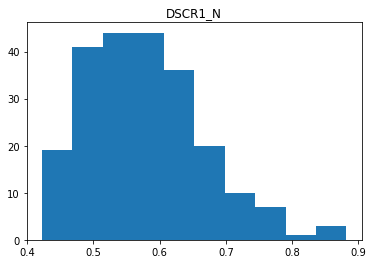

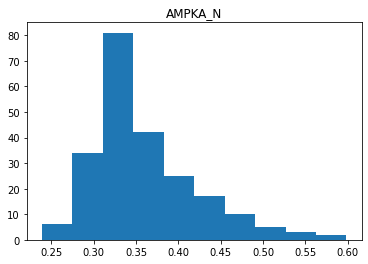

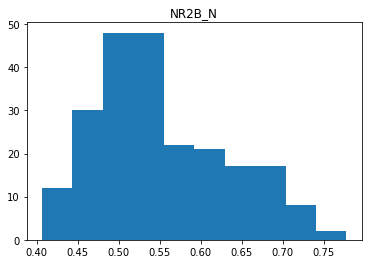

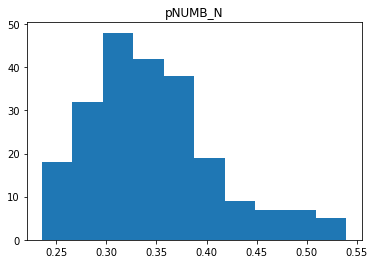

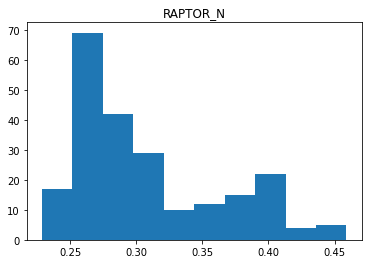

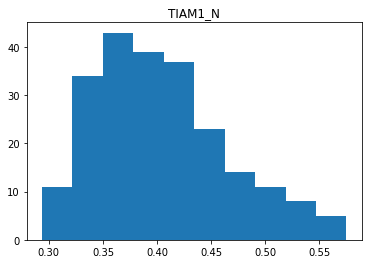

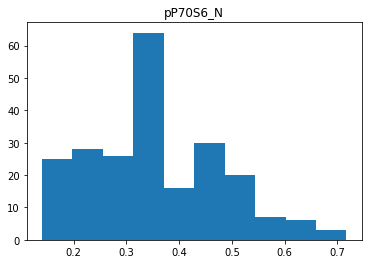

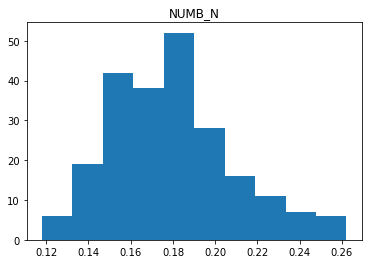

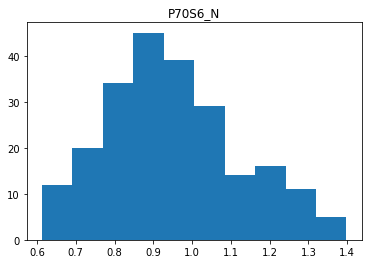

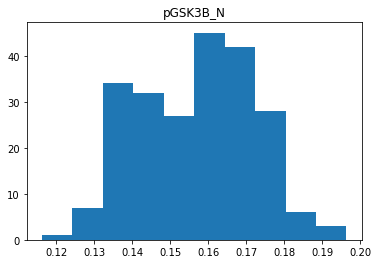

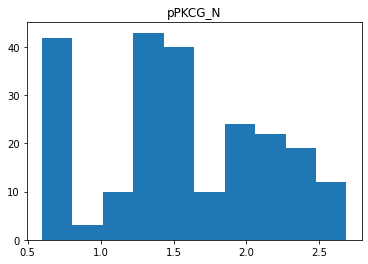

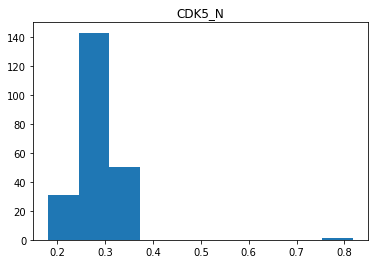

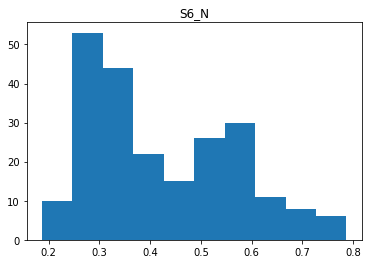

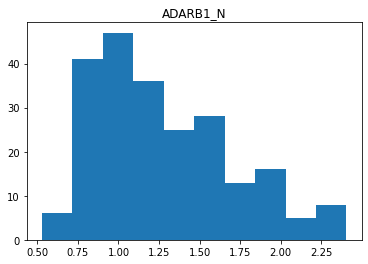

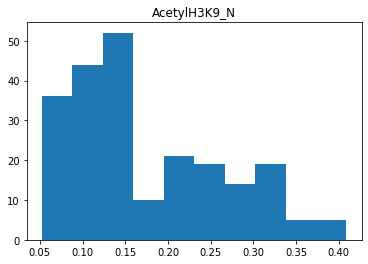

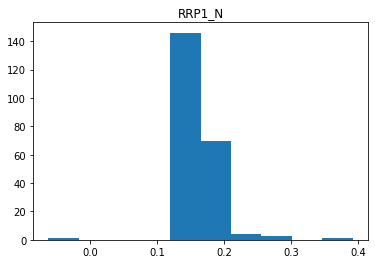

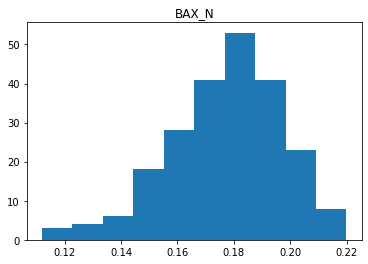

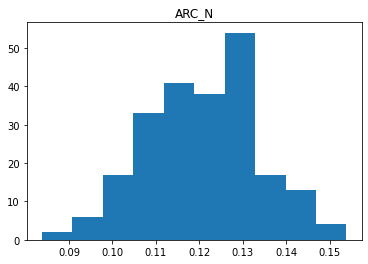

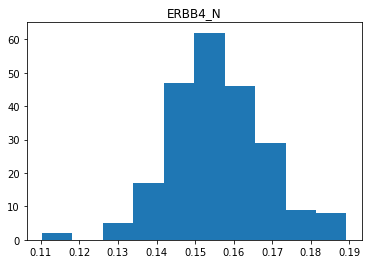

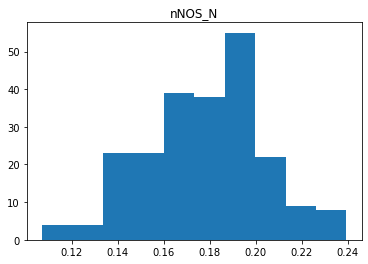

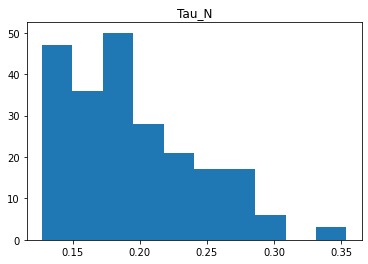

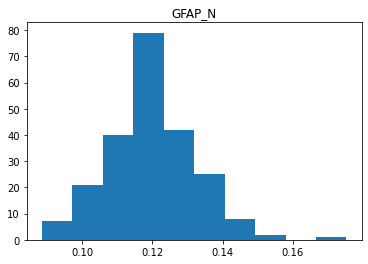

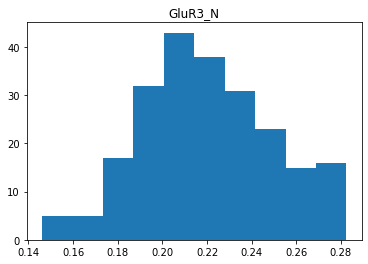

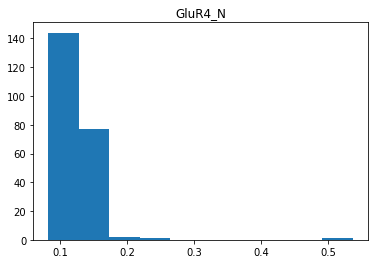

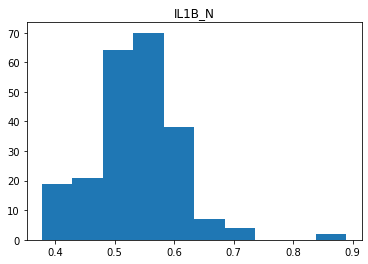

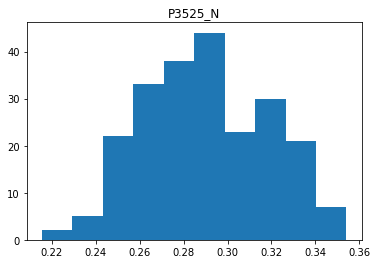

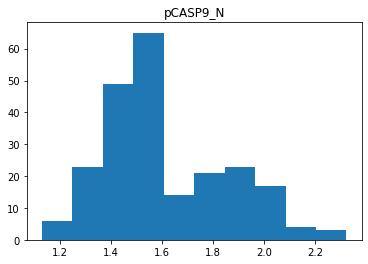

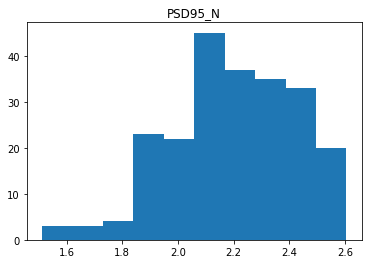

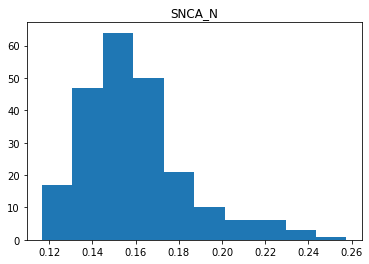

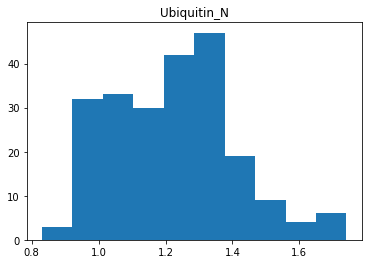

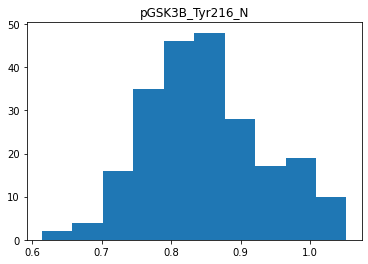

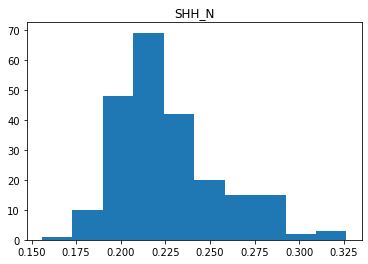

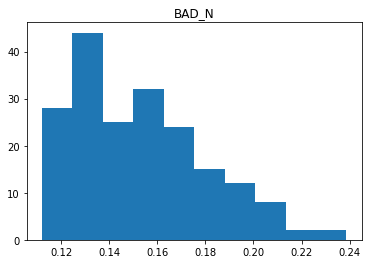

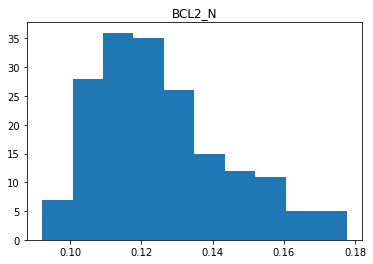

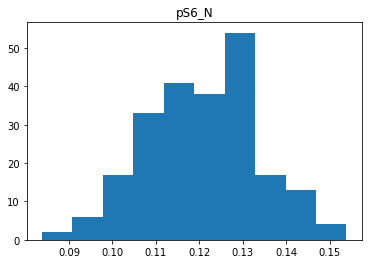

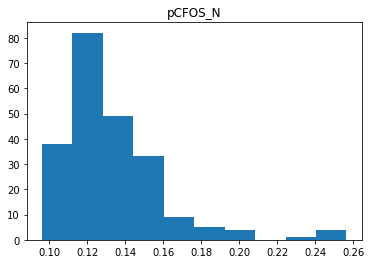

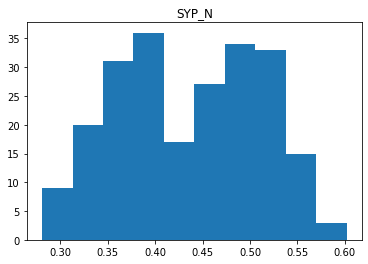

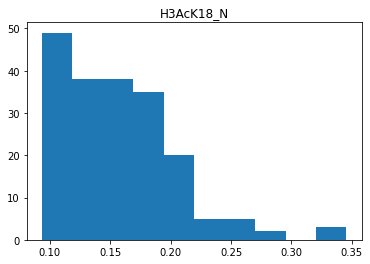

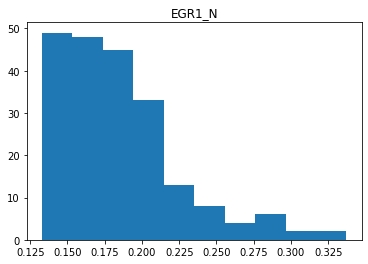

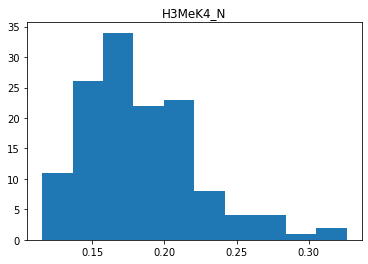

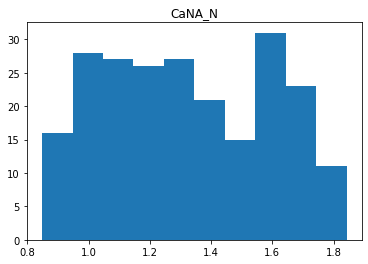

In [ ]:
for i in range(77):      # for loop to draw each feature histogram
    plt.hist(x[:,i])
    plt.title(dataset.columns[i])
    plt.show()

# heatmap
## for corelation checking

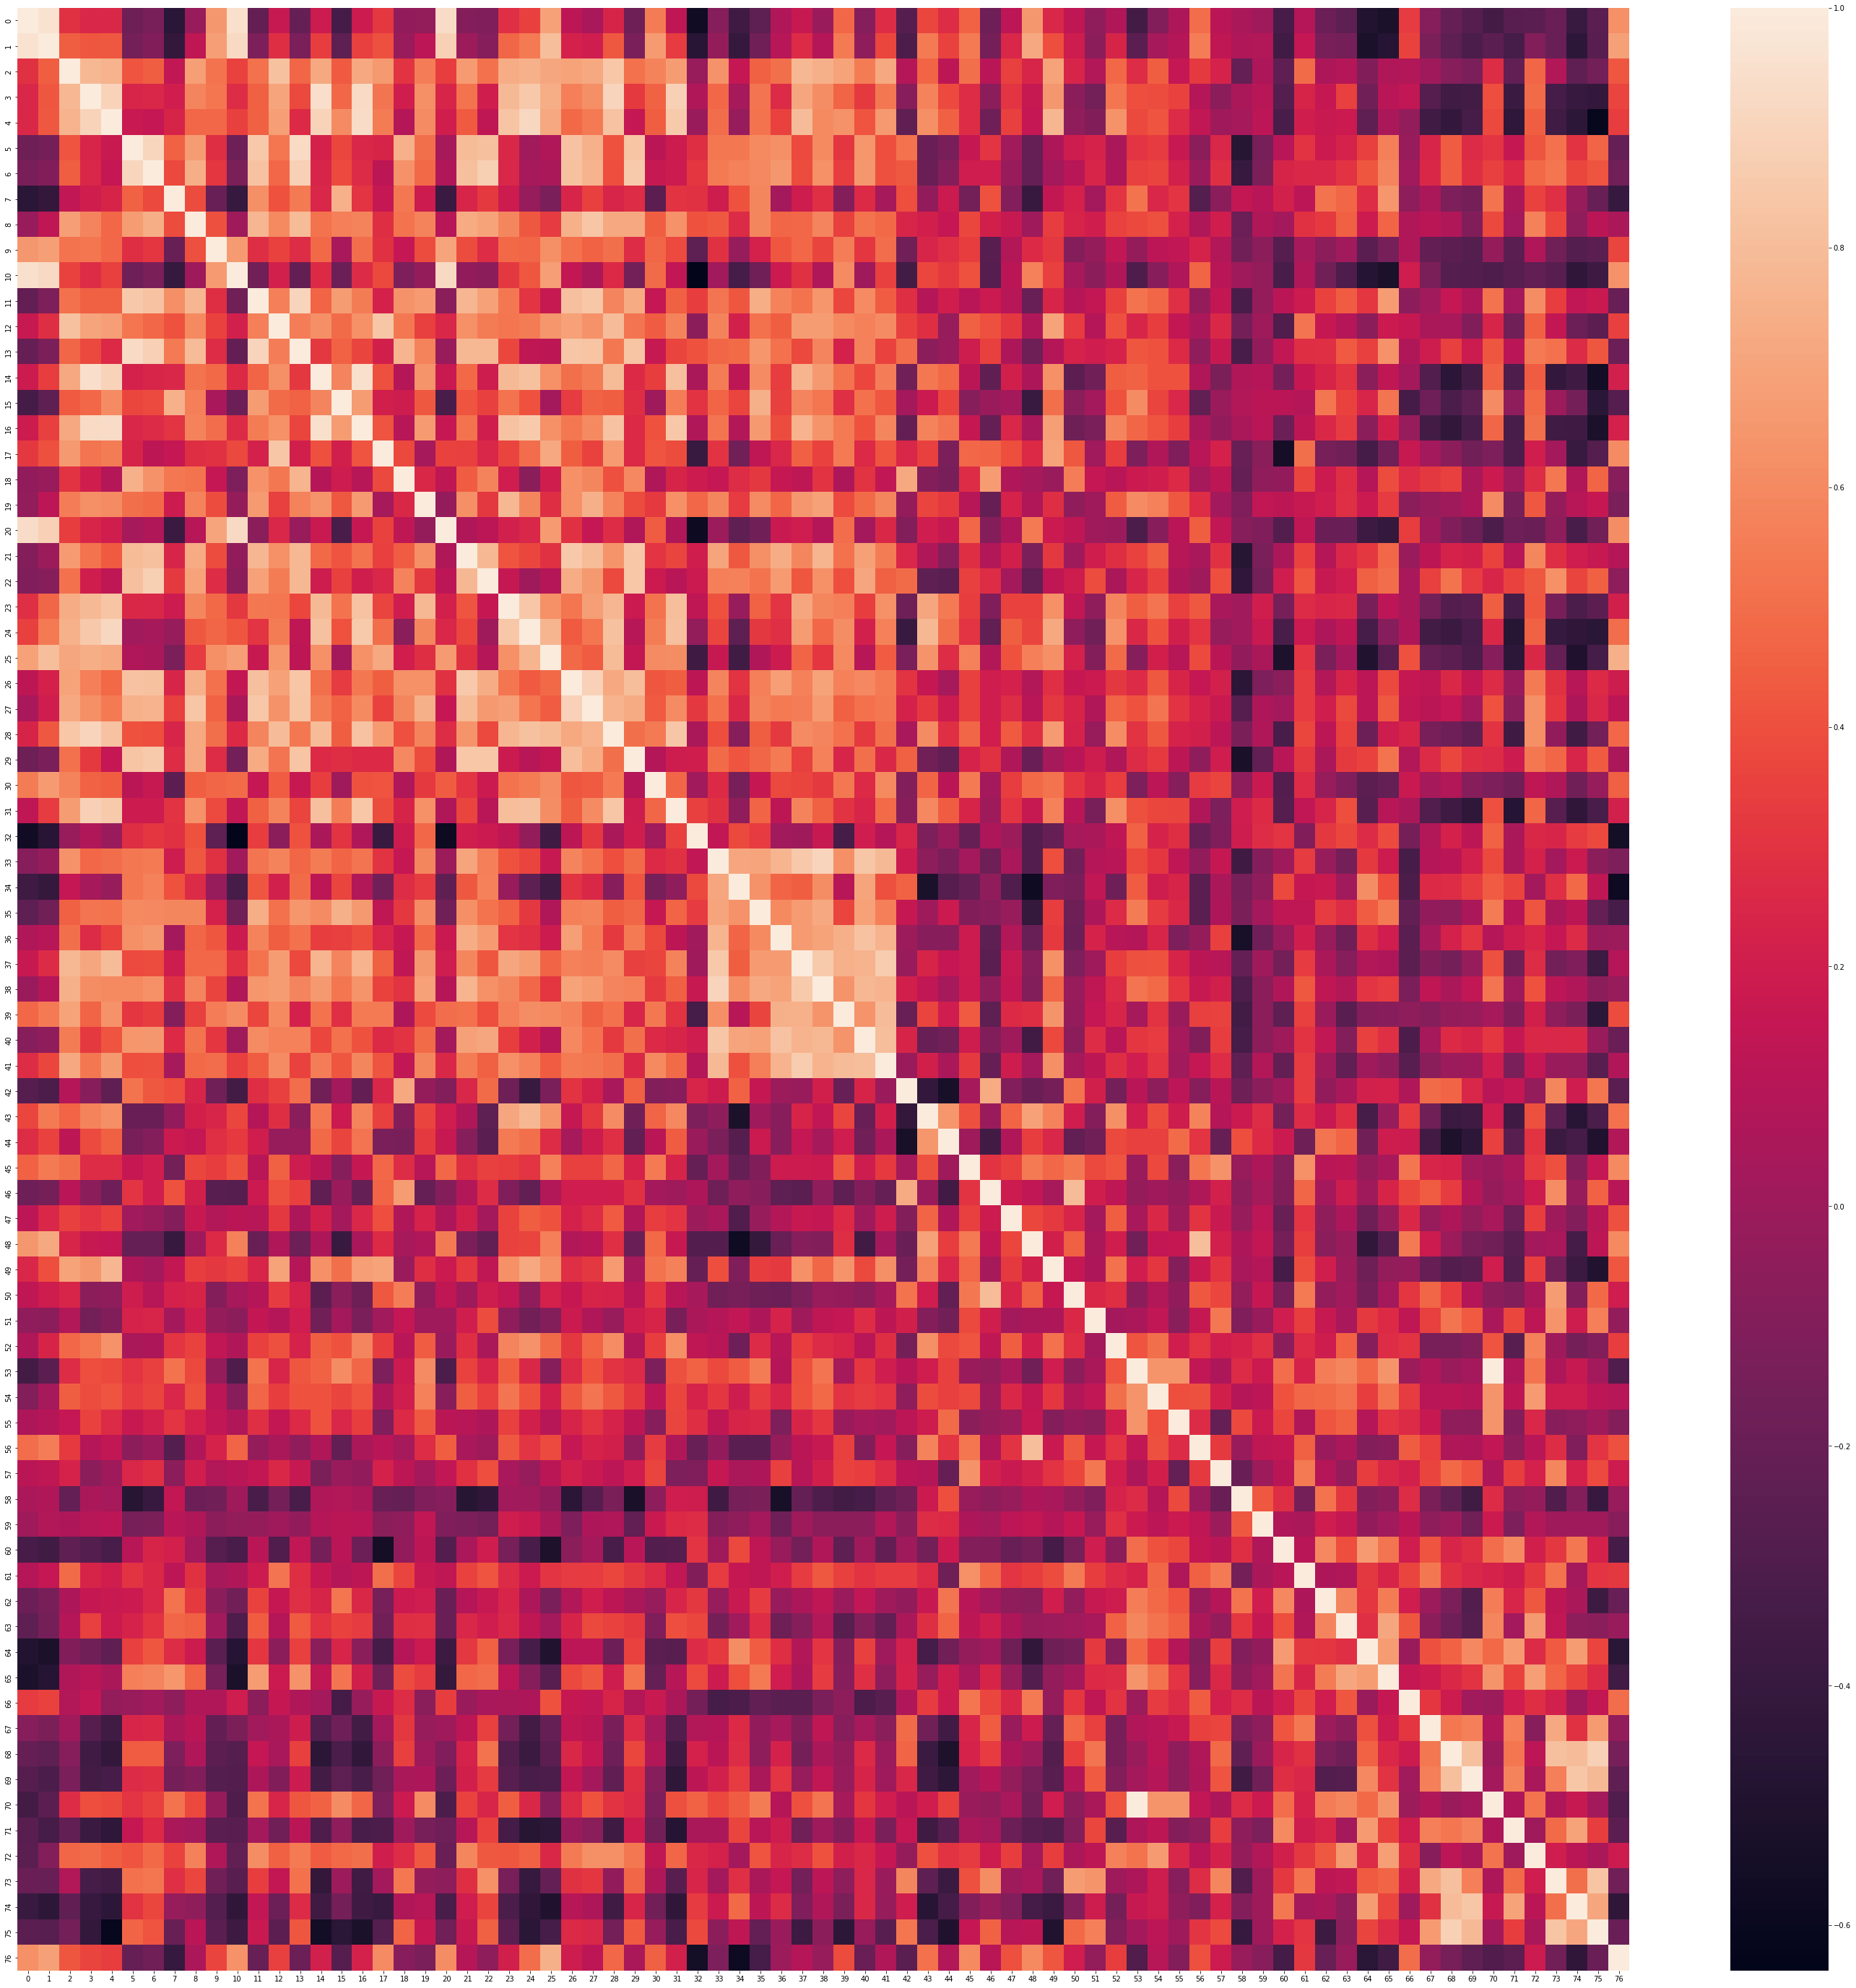

In [ ]:
#checking the corelation b/w the features using heat maps
xdataset = pd.DataFrame(x)
plt.figure(figsize=(50,50))
sns.heatmap(xdataset.corr())

#observation
we can see there is a high co relation between the features as suggested by light color boxes produced in the heatmap

#encodong the label

In [ ]:
from sklearn.preprocessing import LabelEncoder   # we use label encoder to encode the y values
le=LabelEncoder()    # instance of the labelencoder class
le2=LabelEncoder()
y= le.fit_transform(y)    # genrating the encoded label
y2= le2.fit_transform(y2)

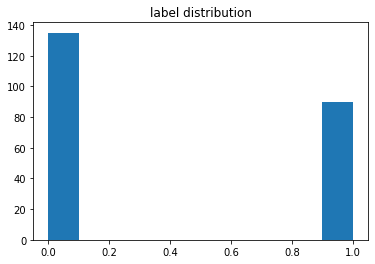

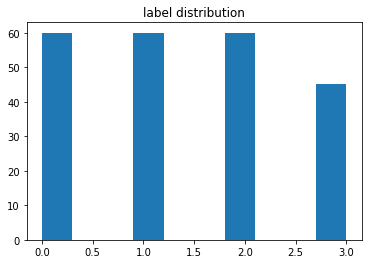

In [ ]:
#graph for label distribution
plt.hist(y)
plt.title('label distribution')
plt.show()
plt.hist(y2)
plt.title('label distribution')
plt.show()

#observation
class A has more instances than class B .prior probability of class A approx to 0.6 and for class B 0.4 approx

#droping the feature which has too many unkowns values  [H3MeK4_N(75)]

In [ ]:
x=np.delete(x,75,axis=1)            # to delete the 75th column  from the x data
np.shape(x)
print(np.isnan(x).sum())

123


#removing all nan values from the features using simpleimputer class

In [ ]:
from sklearn.impute import SimpleImputer   # we use simple imputer class  to change the nan values with the mean
imputer= SimpleImputer(missing_values=np.nan,strategy='mean') #object formation
x[:,68:70]=imputer.fit_transform(x[:,68:70])#apply function to replace nan value to the mean value #only aaply on (real,integer)
x[:,73:75]=imputer.fit_transform(x[:,73:75])

print(np.isnan(x).sum())

0


In [ ]:
# libraries used in model building
from sklearn.model_selection import cross_val_score     # library used to calculate cross validation score
from sklearn import svm   # to import support vector machine
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.linear_model import LogisticRegression  # for logistic regression
from sklearn.model_selection import GridSearchCV   # used to test diffrent model with diffrent hyperparameter
from sklearn.neural_network import MLPClassifier   # neuralnetwork classifier

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),   # genrating a dictornary
        'params' : {
            'C': [1,5,10,15,20,30],
            'kernel': ['rbf','linear']    # with key  as diffrent models
        }
    },
    'random_forest': {                    #  values as diffrent parameters of that particular model
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,50,80,150],      # this is being used in grisearchcv
            'max_depth': [1,10,40,50] ,
            'max_features': [2,10,20,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'l1_ratio' : np.arange(0.1,0.8,0.2)
        }
    },
    'MLPClassifier' :{
        'model': MLPClassifier( max_iter=1000,activation = 'relu',solver='adam',random_state=42),
        'params':{
            'hidden_layer_sizes': np.arange(10,70,10),
            'alpha': [0.0001,0.001,0.01,1]
        }

    }
}





In [ ]:
scores = []    # inititating two empty array to store the  best score , bestparameter and model name
scores2 = []

for model_name, mp in model_params.items():    # initiating a for loop
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)   # gridsearch to test out difrent
                                                                                     # models with diffrent
    clf2 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)  # hyperparameters
    clf.fit(x, y)
    clf2.fit(x, y2)                                                        # we are building crossvalidation code
    scores.append({
        'model': model_name,                                             # for both the models simultaneiously
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    scores2.append({                                                # here we are appending the best required parameters
        'model': model_name,
        'best_score': clf2.best_score_,                          # to score and score2
        'best_params': clf2.best_params_
    })

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penal

In [ ]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])    # here we are displaying the best score of diffrent classifier
                                                                          # for model 1
df

NameError: ignored

In [ ]:
df2 = pd.DataFrame(scores2,columns=['model','best_score','best_params'])   # here we are displaying the best score of diffrent classifier
df2                                                                       # for model2

,model,best_score,best_params
0,svm,0.933333,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.924444,"{'max_depth': 10, 'max_features': 10, 'n_estim..."
2,logistic_regression,0.831111,"{'C': 10, 'l1_ratio': 0.1}"
3,MLPClassifier,0.897778,"{'alpha': 0.01, 'hidden_layer_sizes': 50}"


#features importance

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


76
76


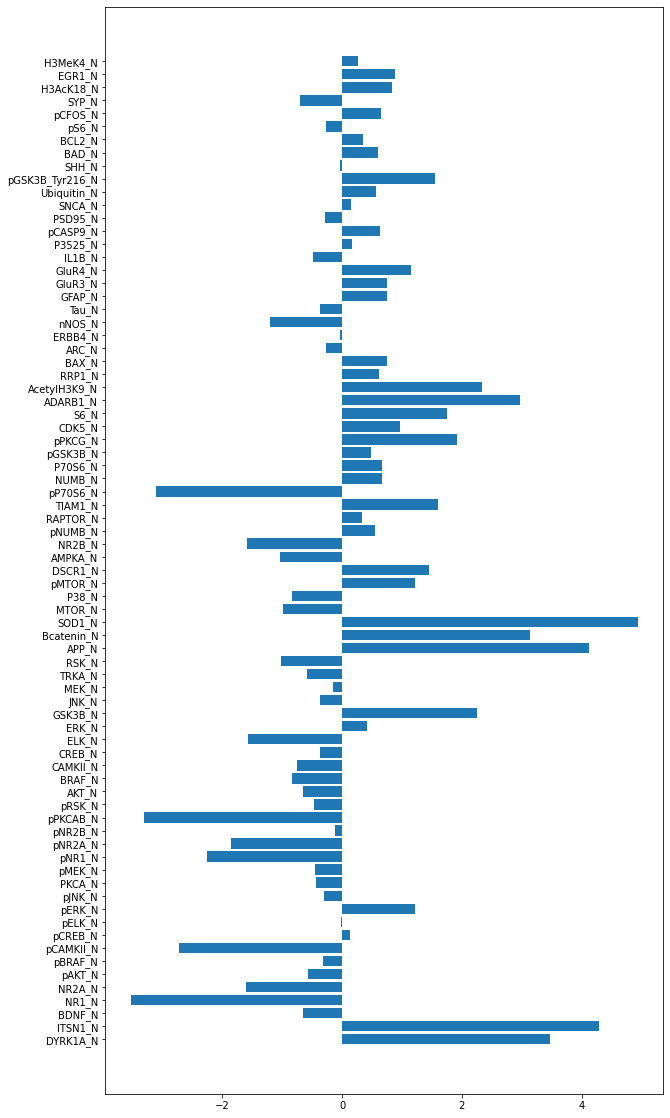

In [ ]:
model1 = LogisticRegression(solver='liblinear',multi_class='auto',C= 10, l1_ratio= 0.1)
                                # here we pick the best paramtere from the cross validation part and training the model
model1.fit(x, y)
# get importance
importance = model1.coef_[0]       # to get the coefficient for evry feature
print(len(importance))           # which inturn depict the importance of that particular feature
feature_names = dataset.columns
features = np.array(feature_names)
f1= features[0:76]
print(len(f1))                             # after getting all the features now we are plotting using bar graphn
plt.figure(figsize=(10, 20))
# plt.bar([x for x in range(len(importance))], importance)
plt.barh(f1,importance)
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


76
76


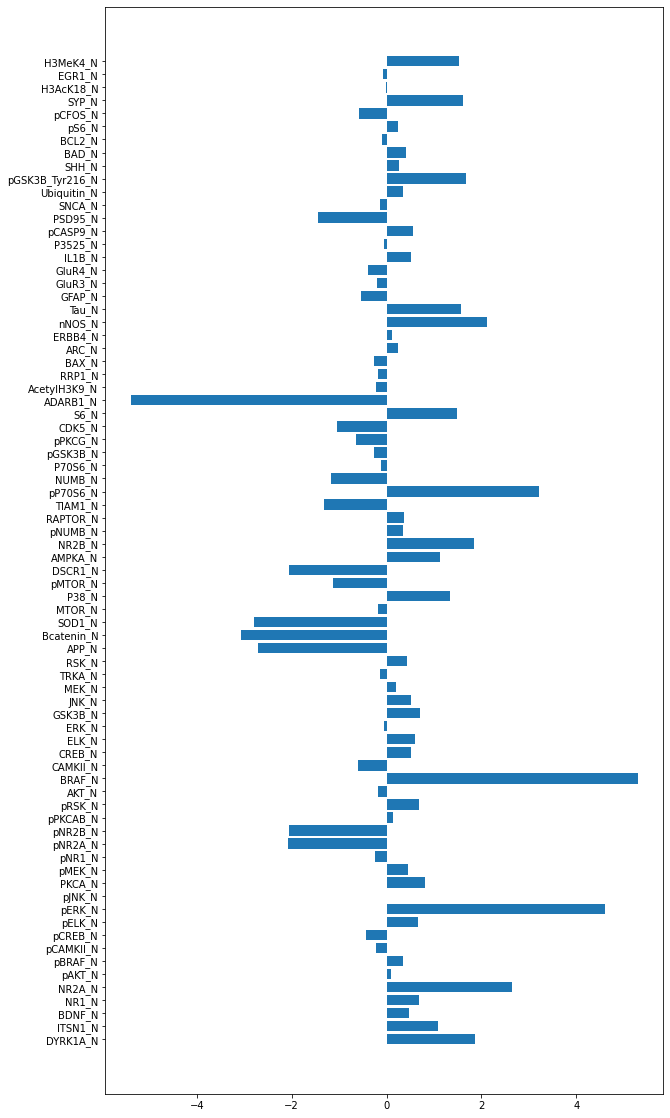

In [ ]:
model12 = LogisticRegression(solver='liblinear',multi_class='auto',C= 10, l1_ratio= 0.1)
model12.fit(x, y2)
# get importance                              # here we are training the logistic regression for model 2
importance = model12.coef_[0]
print(len(importance))
feature_names = dataset.columns
features = np.array(feature_names)
f1= features[0:76]                             # plotting using bar graph
print(len(f1))
plt.figure(figsize=(10, 20))
# plt.bar([x for x in range(len(importance))], importance)
plt.barh(f1,importance)
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
plt.show()

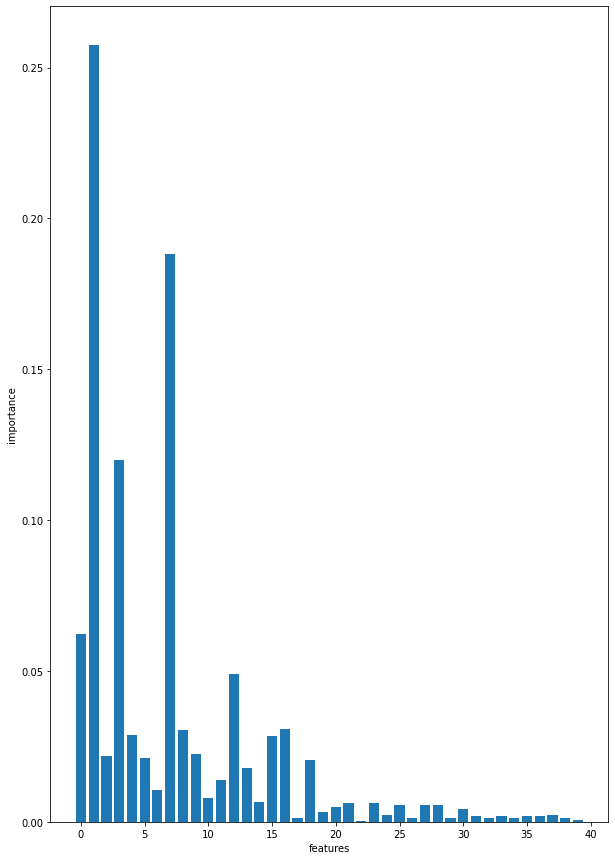

In [ ]:
model2 = RandomForestClassifier(max_depth= 10, max_features= 20, n_estimators= 80)
# fit the model            # picking best features for random  forest and training the model
model2.fit(x, y)
# get importance
importance = model2.feature_importances_
plt.figure(figsize=(10, 15))             # plotting a bar graphn
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('features')
plt.ylabel('importance')
plt.show()

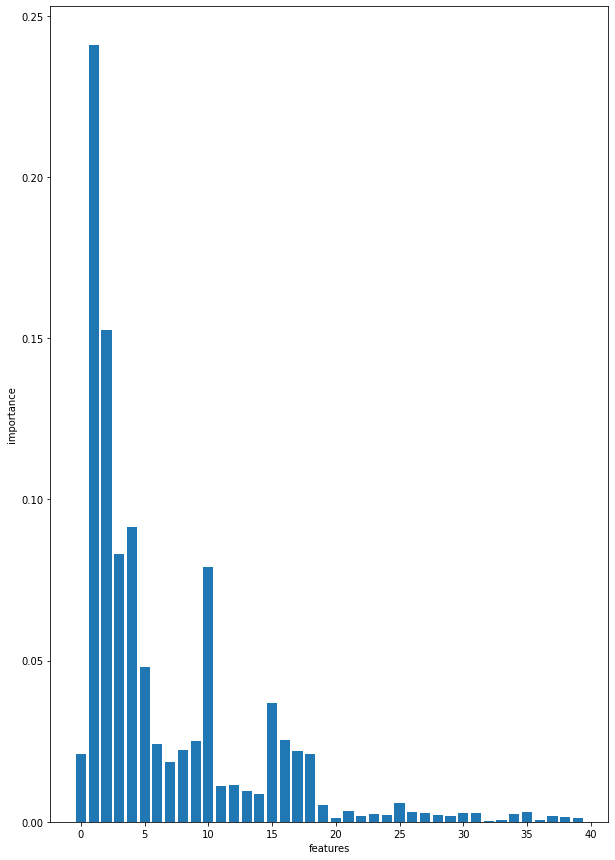

In [ ]:
model22 = RandomForestClassifier(max_depth= 10, max_features= 20, n_estimators= 80)
# fit the model
model22.fit(x, y2)             # for model 2 we are genrating features using best hyperparamtere
# get importance
importance = model22.feature_importances_
plt.figure(figsize=(10, 15))
plt.bar([x for x in range(len(importance))], importance)  # drawing bar graph here
plt.xlabel('features')
plt.ylabel('importance')
plt.show()

Text(0.5, 0, 'Permutation Importance')

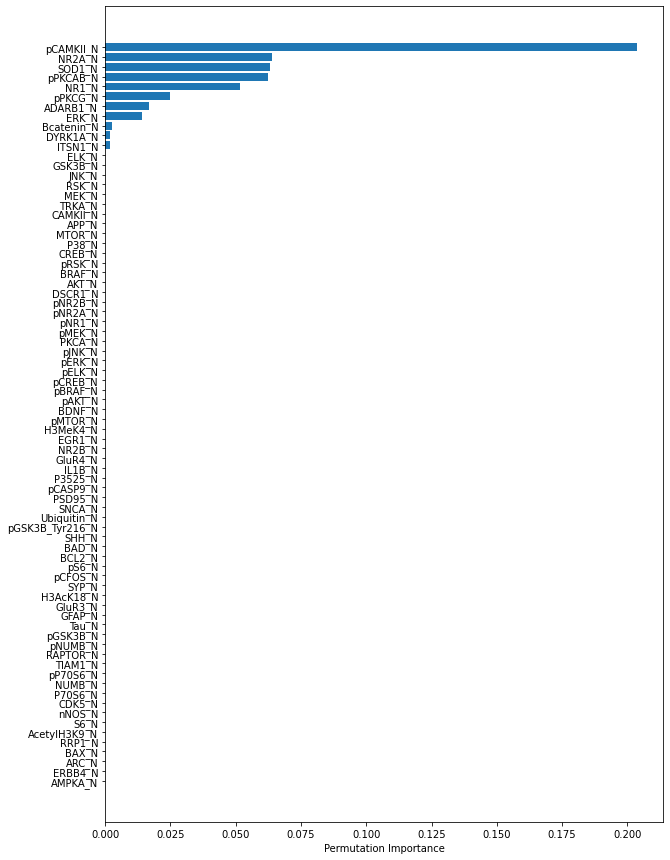

In [ ]:
from sklearn.inspection import permutation_importance

model3 =  svm.SVC(kernel='rbf', C=30,gamma='auto')
model3.fit(x, y)

perm_importance = permutation_importance(model3, x, y)

feature_names = dataset.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 15))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Text(0.5, 0, 'Permutation Importance')

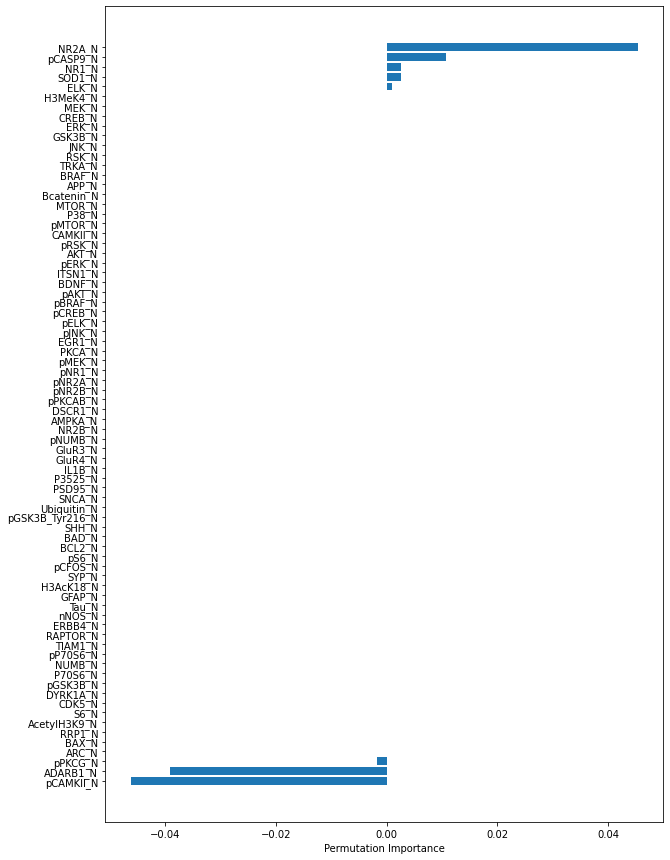

In [ ]:
from sklearn.inspection import permutation_importance

model32 =  svm.SVC(kernel='rbf', C=30,gamma='auto')
model32.fit(x, y2)

perm_importance = permutation_importance(model32, x, y)

feature_names = dataset.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 15))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

#observation
most of the features are reducible as we can see in importance bar graph

#feature reduction using PCA

In [ ]:
#PCA analysis for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 40)
x = pca.fit_transform(x)

print(np.shape(x))


(225, 40)


#obeservation
here we are using PCA (principal component analysis) technique for
dimesion reduction
which reduces the 76 features to 40 features
and all 40 features are co relation free or can say these 40 are perpandicular vectors to each other

In [ ]:
# here we are doing 5 fold cross validation again, now the features are corelation free

scores = []
scores2=[]             # here we are doing 5 fold cross validation again, now the features are corelation free
                        # only important features are now the part of the dataset
                        # this is done to increase the accuracy of the model
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf2 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    clf2.fit(x, y2)
    scores.append({
        'model': model_name,                      # we are using same code as defined above for cross validation
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    scores2.append({
        'model': model_name,
        'best_score': clf2.best_score_,
        'best_params': clf2.best_params_
    })

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penal

In [ ]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params']) # after feature reduction new accuracy score for

df                                                                      # model 1

,model,best_score,best_params
0,svm,0.906667,"{'C': 30, 'kernel': 'rbf'}"
1,random_forest,0.808889,"{'max_depth': 10, 'max_features': 10, 'n_estim..."
2,logistic_regression,0.862222,"{'C': 10, 'l1_ratio': 0.1}"
3,MLPClassifier,0.911111,"{'alpha': 0.0001, 'hidden_layer_sizes': 20}"


In [ ]:
df2 = pd.DataFrame(scores2,columns=['model','best_score','best_params'])   # after feature reduction new accuracy score for
df2                                                                        # for model2

,model,best_score,best_params
0,svm,0.933333,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.804444,"{'max_depth': 40, 'max_features': 10, 'n_estim..."
2,logistic_regression,0.875556,"{'C': 10, 'l1_ratio': 0.1}"
3,MLPClassifier,0.884444,"{'alpha': 0.0001, 'hidden_layer_sizes': 20}"


#observations
from the best score we can conclude that the                        
SVM,and neural networkclassifier(MLP CLASSIFIER)                                                        are producing some good ressults for model 1
and for model 2 SVM is producing good results

#model 1 traininng with best hyperparamters and best dataset

In [ ]:
model1 = LogisticRegression(solver='liblinear',multi_class='auto',C= 10, l1_ratio= 0.1)
model1.fit(x, y)
model2 = RandomForestClassifier(max_depth= 40, max_features= 20, n_estimators= 50)
model2.fit(x, y)
model3 =  svm.SVC(kernel='rbf', C=30,gamma='auto')
model3.fit(x, y)
model4 = MLPClassifier( max_iter=1000,activation = 'relu',solver='adam',random_state=42,alpha= 0.0001,hidden_layer_sizes=20)
model4.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


MLPClassifier(hidden_layer_sizes=20, max_iter=1000, random_state=42)

#model 2 traininng with best hyperparamters and best dataset

In [ ]:
model12 = LogisticRegression(solver='liblinear',multi_class='auto',C= 10, l1_ratio= 0.1)
model12.fit(x, y2)
model22 = RandomForestClassifier(max_depth= 40, max_features= 10, n_estimators= 50)
model22.fit(x, y2)
model32 =  svm.SVC(kernel='linear', C=10,gamma='auto')
model32.fit(x, y2)
model42 = MLPClassifier( max_iter=1000,activation = 'relu',solver='adam',random_state=42,alpha= 0.01,hidden_layer_sizes=50)
model42.fit(x, y2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


MLPClassifier(alpha=0.01, hidden_layer_sizes=50, max_iter=1000, random_state=42)

#testing the model on test data

##building of test data

In [ ]:
dataset1= pd.read_csv('MouseTest.csv')  # dataset importing
#features and labels   # for binary classification (genotype label)
xtest= dataset1.iloc[:,:-2].values
ytest=dataset1.iloc[:,-2].values

ytest2=dataset1.iloc[:,-1].values

In [ ]:
le3=LabelEncoder()
ytest= le3.fit_transform(ytest)

le4=LabelEncoder()
ytest2= le4.fit_transform(ytest2)


In [ ]:
xtest=np.delete(xtest,75,axis=1)
np.shape(xtest)
print(np.isnan(xtest).sum())

123


In [ ]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan,strategy='mean') #object formation
xtest[:,68:70]=imputer.fit_transform(xtest[:,68:70])#apply function to replace nan value to the mean value #only aaply on (real,integer)
xtest[:,73:75]=imputer.fit_transform(xtest[:,73:75])

print(np.isnan(xtest).sum())

0


In [ ]:

xtest= pca.transform(xtest)           # applying pca over the test dataset

##Testing the models over test dataset

In [ ]:
y_pred1 = model1.predict(xtest)
y_pred2 = model2.predict(xtest)         # for model 1 we are predicting test results with diffrent
y_pred3 = model3.predict(xtest)          # classifier
y_pred4 = model4.predict(xtest)

In [ ]:
y_pred12 = model12.predict(xtest)        # for model 2 we are predicting test results with diffrent
y_pred22 = model22.predict(xtest)
y_pred32 = model32.predict(xtest)          # classifier
y_pred42 = model42.predict(xtest)

##Producing the accuracy score and confusion matrix for all the classifier we used

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score   # to get the confusin matrix and accuracy score for model 1 classifiere1
cm = confusion_matrix(ytest, y_pred1)
print(cm)
accuracy_score(ytest, y_pred1)

[[135   0]
 [  0  90]]


1.0

In [ ]:
cm = confusion_matrix(ytest, y_pred2)
print(cm)           # to get the confusin matrix and accuracy score for model 1 classifier 2
accuracy_score(ytest, y_pred2)

[[135   0]
 [  0  90]]


1.0

In [ ]:
cm = confusion_matrix(ytest, y_pred3)
print(cm)  # to get the confusin matrix and accuracy score for model 1 classifier 3
accuracy_score(ytest, y_pred3)

[[135   0]
 [  0  90]]


1.0

In [ ]:
cm = confusion_matrix(ytest, y_pred4)
print(cm)# to get the confusin matrix and accuracy score for model 1 classifier 4
accuracy_score(ytest, y_pred4)

[[135   0]
 [  0  90]]


1.0

###model2

In [ ]:
cm = confusion_matrix(ytest2, y_pred12)
print(cm)# to get the confusin matrix and accuracy score for model 2 classifier1
accuracy_score(ytest2, y_pred12)

[[60  0  0  0]
 [ 0 60  0  0]
 [ 0  0 60  0]
 [ 0  0  0 45]]


1.0

In [ ]:
cm = confusion_matrix(ytest2, y_pred22)
print(cm)# to get the confusin matrix and accuracy score for model 2 classifier2
accuracy_score(ytest2, y_pred22)

[[60  0  0  0]
 [ 0 60  0  0]
 [ 0  0 60  0]
 [ 0  0  0 45]]


1.0

In [ ]:
cm = confusion_matrix(ytest2, y_pred32)
print(cm)# to get the confusin matrix and accuracy score for model 2 classifiere3
accuracy_score(ytest2, y_pred32)

[[60  0  0  0]
 [ 0 60  0  0]
 [ 0  0 60  0]
 [ 0  0  0 45]]


1.0

In [ ]:
cm = confusion_matrix(ytest2, y_pred42)
print(cm)# to get the confusin matrix and accuracy score for model 2 classifiere4
accuracy_score(ytest2, y_pred42)

[[60  0  0  0]
 [ 0 60  0  0]
 [ 0  0 60  0]
 [ 0  0  0 45]]


1.0

#conculsion
*   we successfully seprate out all the classes from the dataset
with 100% accuracy over the test dataset for both the models
*  in 5 fold cross validation phase neural network for model1
and SVM for model 2 produced high level of accuracy
*   PCA help in dimesion reduction and to increase the accuracy of the model
*   neural netwoek with one layer procducing 91 % accuracy for model 1










#refrences


*  https://machinelearningmastery.com/calculate-feature-importance-with-python/
*   https://www.section.io/engineering-education/multi-label-classification-with-scikit-multilearn/
*  https://www.youtube.com/watch?v=HdlDYng8g9s
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


